In [21]:
!pip install python-igraph

     |████████████████████████████████| 2.0 MB 2.2 MB/s eta 0:00:01


In [25]:
!pip install pycairo

     |████████████████████████████████| 344 kB 2.1 MB/s eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for pycairo: filename=pycairo-1.20.1-cp37-cp37m-macosx_10_9_x86_64.whl size=89977 sha256=a5a18ac01d3ae342602fa5eaffe77e2a4ab4292371da099821676622716b55b4
  Stored in directory: /Users/max/Library/Caches/pip/wheels/0f/a7/3d/d8d8e8bd0cfe5cfb9059ccdd9fb6e0130e65c5a5dac41cc881
Successfully built pycairo


In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import igraph as ig

In [2]:
df = pd.read_csv('multicollinearity_config_bigann_small.csv')

In [3]:
df

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,118,119,120,121,122,123,124,125,126,127
0,0,4.137600,0.089244,1.497570,0.216249,0.048090,-0.409770,0.436080,-0.700203,-0.924918,...,-0.001589,-0.008723,0.036647,0.009559,-0.015476,0.000153,-0.018874,0.013690,0.021892,0.001821
1,1,0.089244,3.626219,-0.311875,0.840481,-0.336974,0.068638,-0.183705,0.809751,0.839845,...,0.035240,0.022747,-0.007209,-0.005455,0.001571,-0.023131,0.027366,-0.024500,0.026368,-0.004862
2,2,1.497570,-0.311875,3.766147,-0.925504,0.507774,-0.241431,0.219162,0.106550,-0.224753,...,0.023367,0.040972,0.002159,-0.008853,0.017962,0.036459,0.025606,-0.001333,0.006455,-0.015060
3,3,0.216249,0.840481,-0.925504,2.953979,-0.842814,0.759932,0.107501,0.432176,-0.141300,...,-0.003655,0.026633,-0.005418,-0.015192,0.032942,-0.003281,0.025367,0.004236,0.007226,-0.038212
4,4,0.048090,-0.336974,0.507774,-0.842814,4.072443,-0.294841,1.039821,0.109032,-0.947685,...,0.007893,-0.022076,-0.013452,0.014349,-0.005492,0.039935,0.067516,0.009800,0.014725,0.014386
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,123,0.000153,-0.023131,0.036459,-0.003281,0.039935,-0.006267,0.034031,-0.081781,0.011071,...,-0.146945,-0.287828,0.227726,0.884513,-0.814136,2.923347,-0.708709,0.766615,0.105042,0.429889
124,124,-0.018874,0.027366,0.025606,0.025367,0.067516,0.003053,0.004791,0.030827,0.015329,...,-0.599354,-0.469124,0.087410,-0.330842,0.537658,-0.708709,3.906142,-0.327825,0.979952,0.122917
125,125,0.013690,-0.024500,-0.001333,0.004236,0.009800,0.024915,0.017251,-0.015938,-0.023278,...,-0.032794,-0.767507,-0.392251,0.097603,-0.230284,0.766615,-0.327825,2.933746,-0.525917,0.612415
126,126,0.021892,0.026368,0.006455,0.007226,0.014725,-0.001666,0.020604,0.037305,0.005422,...,-1.890966,-0.109803,0.421439,-0.192961,0.234462,0.105042,0.979952,-0.525917,3.104193,-0.905944


In [4]:
df = df.drop(columns=['Unnamed: 0'])

In [5]:
A = df.to_numpy()

In [6]:
A.shape

(128, 128)

In [15]:
A.min()

-5.787260368366659

In [25]:
for i in range(128):
    for j in range(128):
        A[i,i] = 0

In [26]:
np.where(A == np.amax(A))

(array([54]), array([52]))

In [29]:
G = nx.Graph()
eps = 0.00001
for i in range(128):
    for j in range(128):
        if i == j:
            continue
        if abs(A[i,j]) > eps:
            G.add_edge(i,j,w=A[i,j])

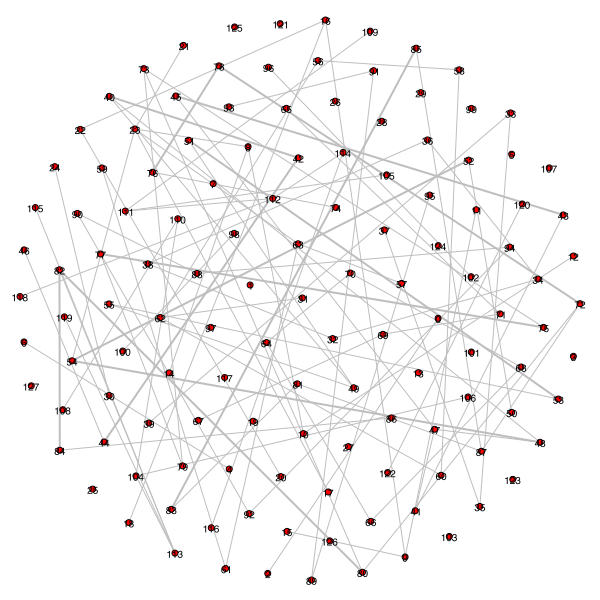

In [30]:
for i in G.nodes():
    #print(i)
    G.nodes[i]['label'] = str(i) #it is required to have "label" with the name
    
nx.write_graphml(G,'graph.graphml')    #write the graph from nx
Gix = ig.read('graph.graphml',format="graphml") #read the graph from igraph
layout = Gix.layout("kk") #start plotting
visual_style = {}
visual_style["vertex_size"] = 6
visual_style["title"] = "fffff"

visual_style["vertex_label_size"] = 10
visual_style["edge_width"] = [int(i) for i in Gix.es['w']]
visual_style["edge_size"] = 1
visual_style['edge_color'] = 'gray'
visual_style['edge_arrow_size'] = 0.5
ig.plot(Gix,**visual_style)

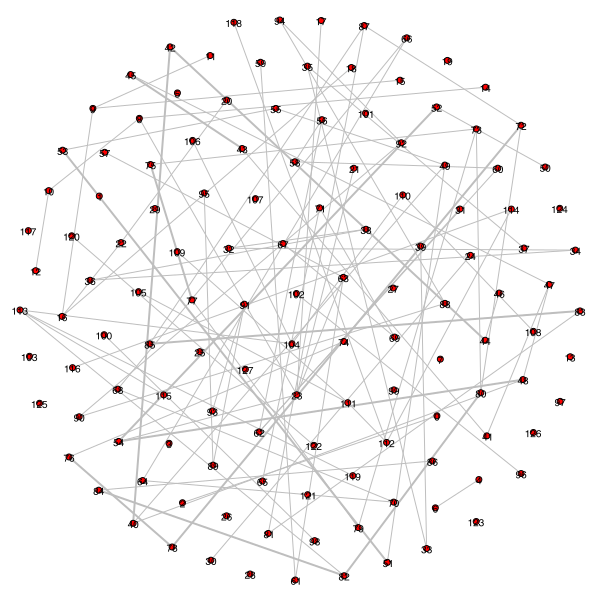

In [31]:
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
G0 = G.subgraph(Gcc[0])
for i in G0.nodes():
    #print(i)
    G0.nodes[i]['label'] = str(i) #it is required to have "label" with the name
    
nx.write_graphml(G0,'graph.graphml')    #write the graph from nx
Gix = ig.read('graph.graphml',format="graphml") #read the graph from igraph
layout = Gix.layout("kk") #start plotting
visual_style = {}
visual_style["vertex_size"] = 6
visual_style["title"] = "fffff"

visual_style["vertex_label_size"] = 10
visual_style["edge_width"] = [int(i) for i in Gix.es['w']]
visual_style["edge_size"] = 1
visual_style['edge_color'] = 'gray'
visual_style['edge_arrow_size'] = 0.5
ig.plot(Gix,**visual_style)

In [32]:
p = np.percentile(np.abs(A.flatten()),95)

In [33]:
p

0.8962421642597188

In [122]:
G = nx.Graph()
eps = 0.00001
for i in range(128):
    for j in range(128):
        if i == j:
            continue
        if A[i,j] > p:
            G.add_edge(i,j,w=A[i,j])

128


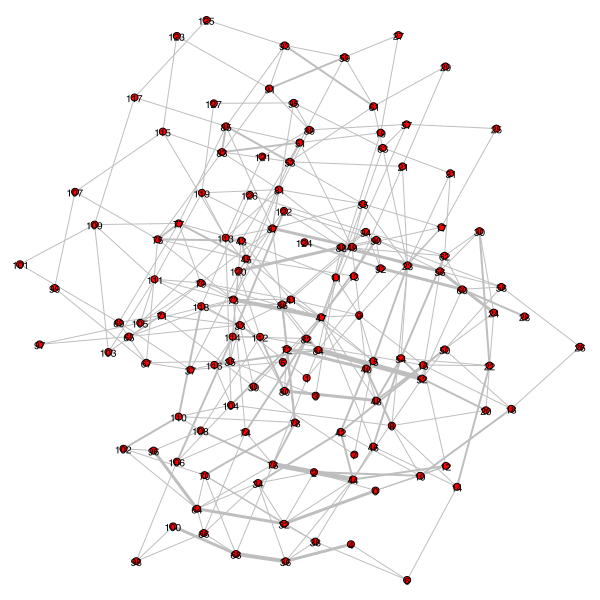

In [43]:
print(len(G.nodes()))
for i in G.nodes():
    #print(i)
    G.nodes[i]['label'] = str(i) #it is required to have "label" with the name
    
nx.write_graphml(G,'graph.graphml')    #write the graph from nx
Gix = ig.read('graph.graphml',format="graphml") #read the graph from igraph
layout = Gix.layout("fr") #start plotting
visual_style = {}
visual_style["vertex_size"] = 7
visual_style["title"] = "fffff"

visual_style["vertex_label_size"] = 10
visual_style["edge_width"] = [int(i) for i in Gix.es['w']]
visual_style["edge_size"] = 1
visual_style['edge_color'] = 'gray'
visual_style['edge_arrow_size'] = 0.5
ig.plot(Gix,**visual_style)

In [45]:
Gcc

[{0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127}]

In [61]:
Gs = sorted([[A[e],e] for e in G.edges()],reverse=True)
Gs

[[2.261194358855793, (52, 54)],
 [2.2540037459798965, (82, 84)],
 [2.2219423075050693, (76, 78)],
 [2.1724775887809864, (42, 44)],
 [2.1669281372291755, (83, 85)],
 [2.159227961110031, (51, 53)],
 [2.106172631210088, (75, 77)],
 [2.1023126560740586, (72, 78)],
 [2.089155771772388, (43, 45)],
 [2.073425597167716, (48, 54)],
 [2.053095877118188, (82, 80)],
 [2.049119008886529, (40, 42)],
 [1.7270463117232189, (47, 48)],
 [1.7158691546570373, (41, 47)],
 [1.7043808575824315, (73, 80)],
 [1.7027827141087757, (73, 79)],
 [1.6789183712313511, (112, 114)],
 [1.6441300296808437, (87, 81)],
 [1.6437798307940157, (49, 55)],
 [1.5950880559394407, (16, 22)],
 [1.5739328203388836, (120, 122)],
 [1.5635440810333023, (24, 30)],
 [1.561847252604546, (60, 62)],
 [1.5379739309988794, (34, 36)],
 [1.5375730681139732, (23, 17)],
 [1.5371415022307662, (90, 92)],
 [1.5350503721940585, (15, 9)],
 [1.5258374670392896, (111, 105)],
 [1.5230871479214496, (113, 119)],
 [1.5145335405733416, (70, 68)],
 [1.4995197

In [63]:
for i in range(0,128,8):
    print(i)

0
8
16
24
32
40
48
56
64
72
80
88
96
104
112
120


In [71]:
friends = []
for e in Gs:
    l = e[1]
    if l[0] not in friends and l[1] not in friends:
        friends.append(l[0])
        friends.append(l[1])

In [72]:
len(friends)

112

In [75]:
Gs[0][1][0]

52

In [76]:
Gs[0][1][1]

54

In [84]:
for n in G.neighbors(52):
    print(n)

20
40
44
48
50
54
56
60
84


In [114]:
friends = []
Gs = sorted([[A[e],e] for e in G.edges()],reverse=True)  #ordered by highest weighted edges first
for e in Gs:
    l = e[1]
    if l[0] not in friends: #make sure the node has not been added yet
        friends.append(l[0]) #add the node
        for n in G.neighbors(l[0]): #for all the neighbors (unsorted?)
            if n not in friends: #add the neighbor if it has not yet been added
                friends.append(n)
friends += [i for i in range(128) if i not in friends] #include any missing dimensions
print(len(friends))
print(friends)

128
[52, 20, 40, 44, 48, 50, 54, 56, 60, 84, 82, 42, 74, 80, 90, 113, 114, 76, 64, 68, 78, 108, 83, 43, 51, 53, 75, 81, 85, 91, 115, 72, 87, 104, 47, 9, 15, 16, 39, 41, 45, 46, 49, 55, 73, 79, 112, 111, 118, 120, 124, 24, 17, 22, 30, 34, 1, 2, 4, 32, 36, 66, 67, 23, 8, 13, 21, 31, 63, 70, 37, 38, 100, 102, 103, 96, 105, 110, 0, 10, 12, 59, 27, 57, 61, 93, 88, 62, 94, 122, 35, 3, 5, 33, 69, 89, 95, 121, 65, 71, 97, 58, 26, 92, 98, 106, 28, 11, 19, 107, 99, 109, 119, 127, 126, 116, 117, 125, 18, 86, 77, 14, 6, 101, 25, 7, 29, 123]


In [133]:
buddies = []
Gs = sorted([[A[e],e] for e in G.edges()],reverse=True)  #ordered by highest weighted edges first
for e in Gs:
    l = e[1] #node tuple
    n = l[0] #right node
    if n not in buddies: #make sure the node has not been added yet
        buddies.append(n) #add the node
        bestest = sorted(G[n].items(), key=lambda item: item[1]['w'], reverse=True) #neighbors sorted by desc weight
        for b in bestest: #for all the closest neighbors
            f = b[0] #neighbor node
            if f not in buddies: #add the neighbor node if it has not yet been added
                buddies.append(f)
buddies += [i for i in range(128) if i not in buddies] #include any missing nodes
print(len(buddies))
print(buddies)

128
[54, 52, 48, 23, 78, 82, 84, 80, 113, 42, 83, 85, 81, 43, 51, 53, 49, 77, 75, 79, 40, 41, 47, 73, 112, 114, 111, 118, 87, 72, 16, 22, 9, 18, 122, 120, 91, 24, 30, 17, 62, 60, 56, 31, 34, 36, 32, 67, 1, 90, 92, 88, 121, 15, 0, 13, 70, 68, 64, 103, 37, 102, 96, 69, 8, 10, 14, 104, 110, 106, 44, 46, 55, 74, 76, 61, 59, 63, 35, 33, 2, 66, 38, 89, 95, 65, 71, 58, 94, 4, 6, 98, 100, 26, 28, 11, 107, 109, 124, 126, 19, 21, 115, 117, 119, 57, 39, 3, 5, 7, 12, 20, 25, 27, 29, 45, 50, 86, 93, 97, 99, 101, 105, 108, 116, 123, 125, 127]


In [134]:
buddies

[54,
 52,
 48,
 23,
 78,
 82,
 84,
 80,
 113,
 42,
 83,
 85,
 81,
 43,
 51,
 53,
 49,
 77,
 75,
 79,
 40,
 41,
 47,
 73,
 112,
 114,
 111,
 118,
 87,
 72,
 16,
 22,
 9,
 18,
 122,
 120,
 91,
 24,
 30,
 17,
 62,
 60,
 56,
 31,
 34,
 36,
 32,
 67,
 1,
 90,
 92,
 88,
 121,
 15,
 0,
 13,
 70,
 68,
 64,
 103,
 37,
 102,
 96,
 69,
 8,
 10,
 14,
 104,
 110,
 106,
 44,
 46,
 55,
 74,
 76,
 61,
 59,
 63,
 35,
 33,
 2,
 66,
 38,
 89,
 95,
 65,
 71,
 58,
 94,
 4,
 6,
 98,
 100,
 26,
 28,
 11,
 107,
 109,
 124,
 126,
 19,
 21,
 115,
 117,
 119,
 57,
 39,
 3,
 5,
 7,
 12,
 20,
 25,
 27,
 29,
 45,
 50,
 86,
 93,
 97,
 99,
 101,
 105,
 108,
 116,
 123,
 125,
 127]

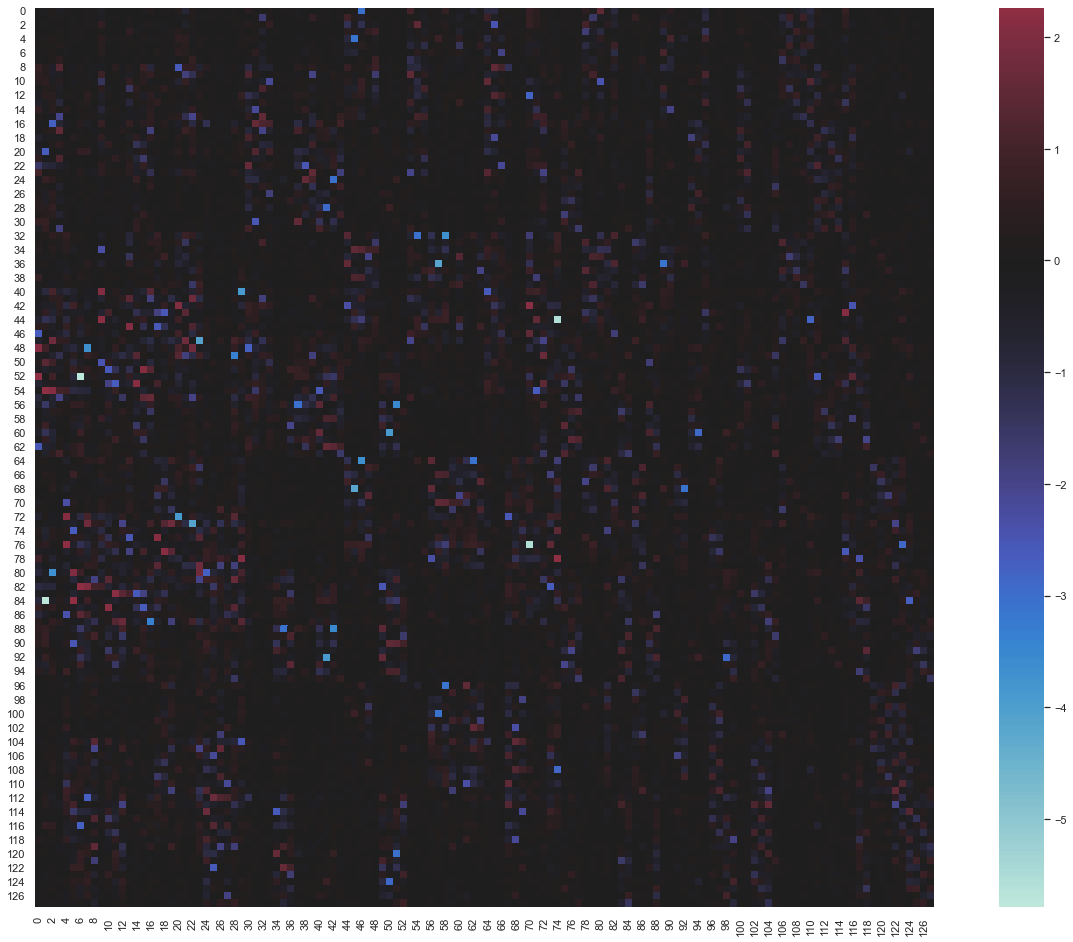

In [130]:
import seaborn as sns
import matplotlib.pyplot as plt
scale = 2
wd = 11.7 * scale
ht = 8.27 * scale
sns.set(rc={'figure.figsize':(wd,ht)})
sns.heatmap(A[:,friends2],annot=False,center=0,vmax=A.max(),vmin=A.min(),square=True)
plt.show()

In [113]:
for n in G:
    print(n,G[n])

0 {2: {'w': 1.4975700512331267}, 8: {'w': 0.9249181798068932}, 10: {'w': 1.0060672480631223}, 12: {'w': 1.0069603337676372}, 15: {'w': 0.9683501633735736}, 32: {'w': 3.0288118984347685}, 38: {'w': 0.9170752467008784}}
2 {0: {'w': 1.4975700512331267}, 3: {'w': 0.9255042046518196}, 10: {'w': 2.4302951068330403}, 32: {'w': 1.1696738849827208}, 34: {'w': 1.279924955225221}, 35: {'w': 0.9789219132098244}}
8 {0: {'w': 0.9249181798068932}, 4: {'w': 0.9476854966175534}, 10: {'w': 1.4971202316135954}, 14: {'w': 1.053244160603351}, 16: {'w': 0.9606121045989724}, 20: {'w': 1.1083290424507042}, 23: {'w': 1.323501457758875}, 40: {'w': 2.601883766830092}, 104: {'w': 1.2845105232719134}}
10 {0: {'w': 1.0060672480631223}, 2: {'w': 2.4302951068330403}, 8: {'w': 1.4971202316135954}, 12: {'w': 1.2605933772097289}, 18: {'w': 2.134797547227835}, 42: {'w': 1.3711080069928376}}
12 {0: {'w': 1.0069603337676372}, 10: {'w': 1.2605933772097289}, 16: {'w': 1.187894861265289}, 20: {'w': 0.9866780861701688}, 44: {'

54

In [149]:
first = Gs[0][1][1]
print(first)
T = nx.bfs_tree(G,source=first,depth_limit=3)
print([(e,A[e[0],e[1]]) for e in T.edges()])

52
[((52, 48), 0.9242150660882656), ((52, 50), 1.4080005628234848), ((52, 54), 2.261194358855793), ((48, 40), 1.0473880526569928), ((48, 47), 1.727046311723209), ((54, 23), 1.0347198863699605), ((54, 78), 0.9167343890354022), ((40, 42), 2.049119008886529), ((40, 49), 1.336970375318311), ((47, 41), 1.7158691546570384), ((47, 45), 1.2049917749050747), ((47, 87), 0.960395488573908), ((23, 8), 1.323501457758875), ((23, 17), 1.5375730681139732), ((23, 21), 1.177679843225738), ((23, 63), 1.0043977596183298), ((78, 72), 2.1023126560740577), ((78, 76), 2.221942307505074)]


[0.9242150660882656,
 1.4080005628234848,
 2.261194358855793,
 1.0473880526569928,
 1.727046311723209,
 1.0347198863699605,
 0.9167343890354022,
 2.049119008886529,
 1.336970375318311,
 1.7158691546570384,
 1.2049917749050747,
 0.960395488573908,
 1.323501457758875,
 1.5375730681139732,
 1.177679843225738,
 1.0043977596183298,
 2.1023126560740577,
 2.221942307505074]

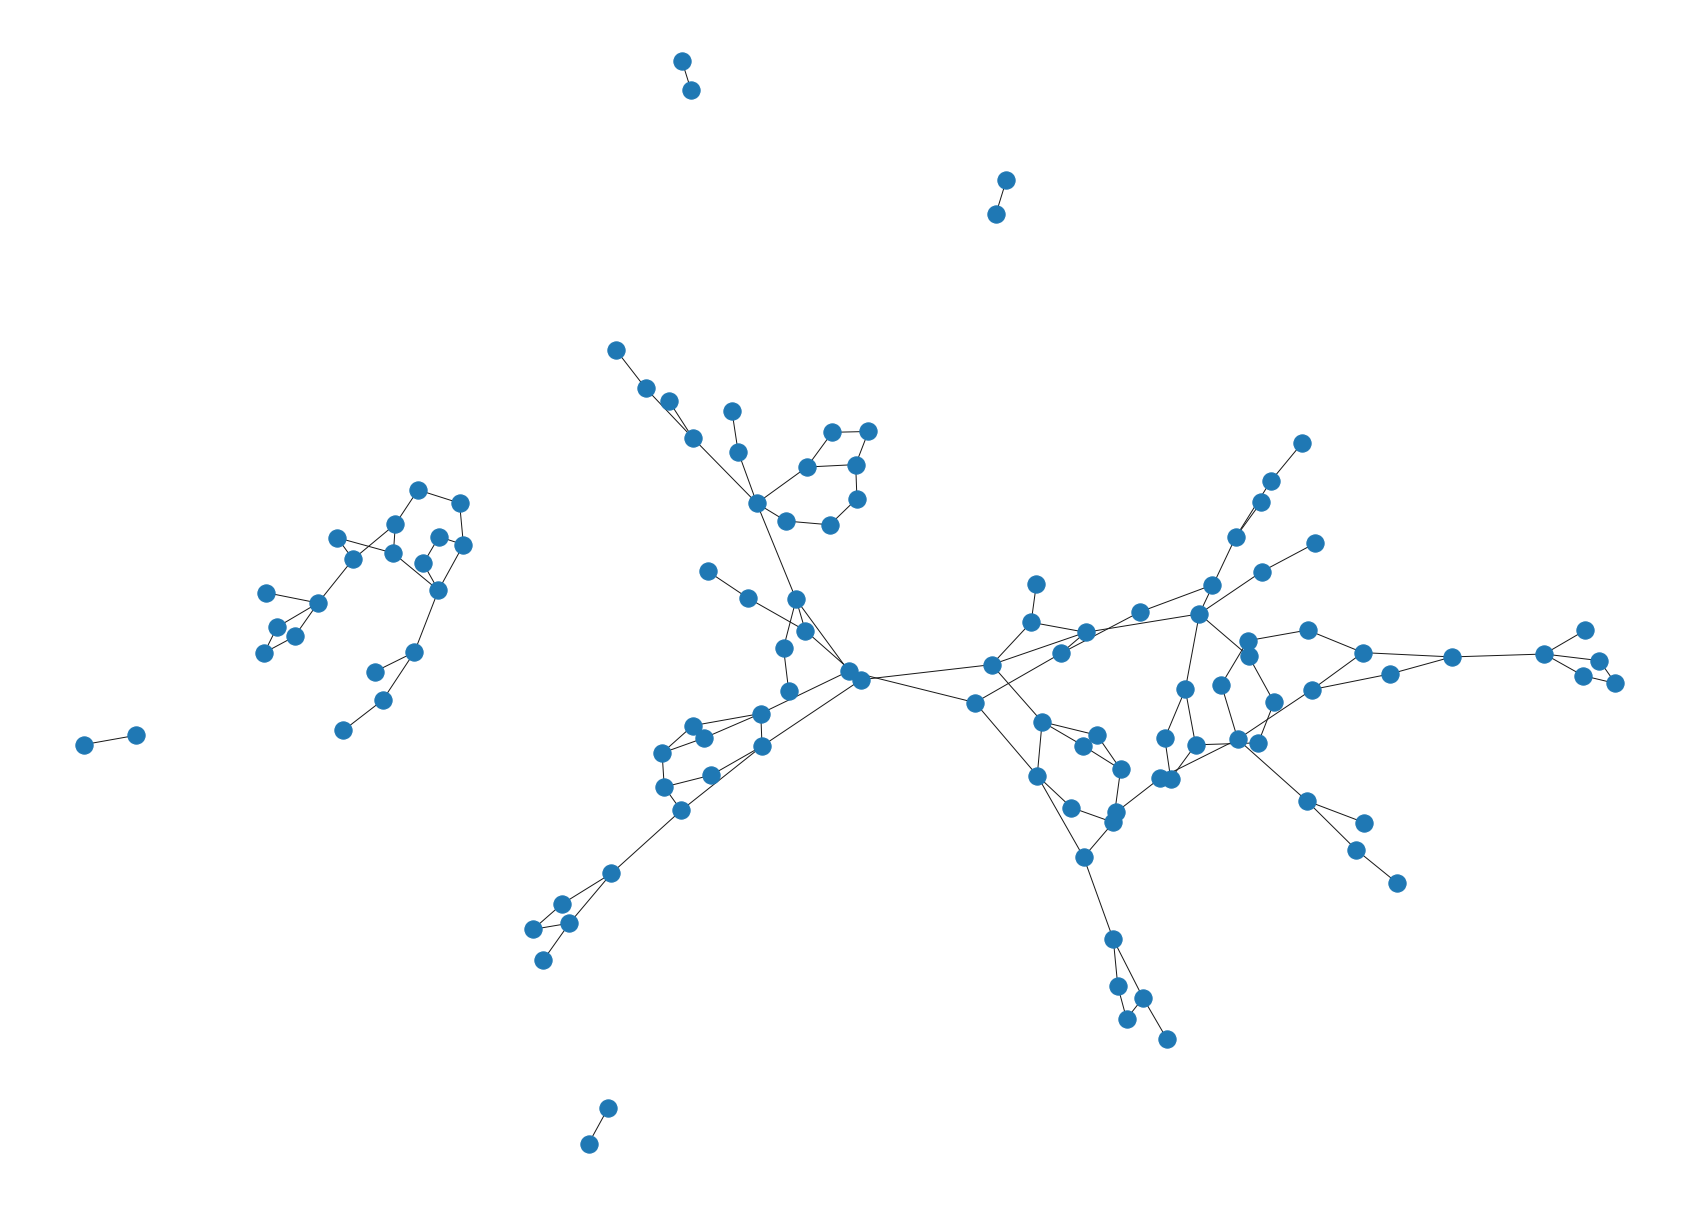

In [150]:
nx.draw(G)

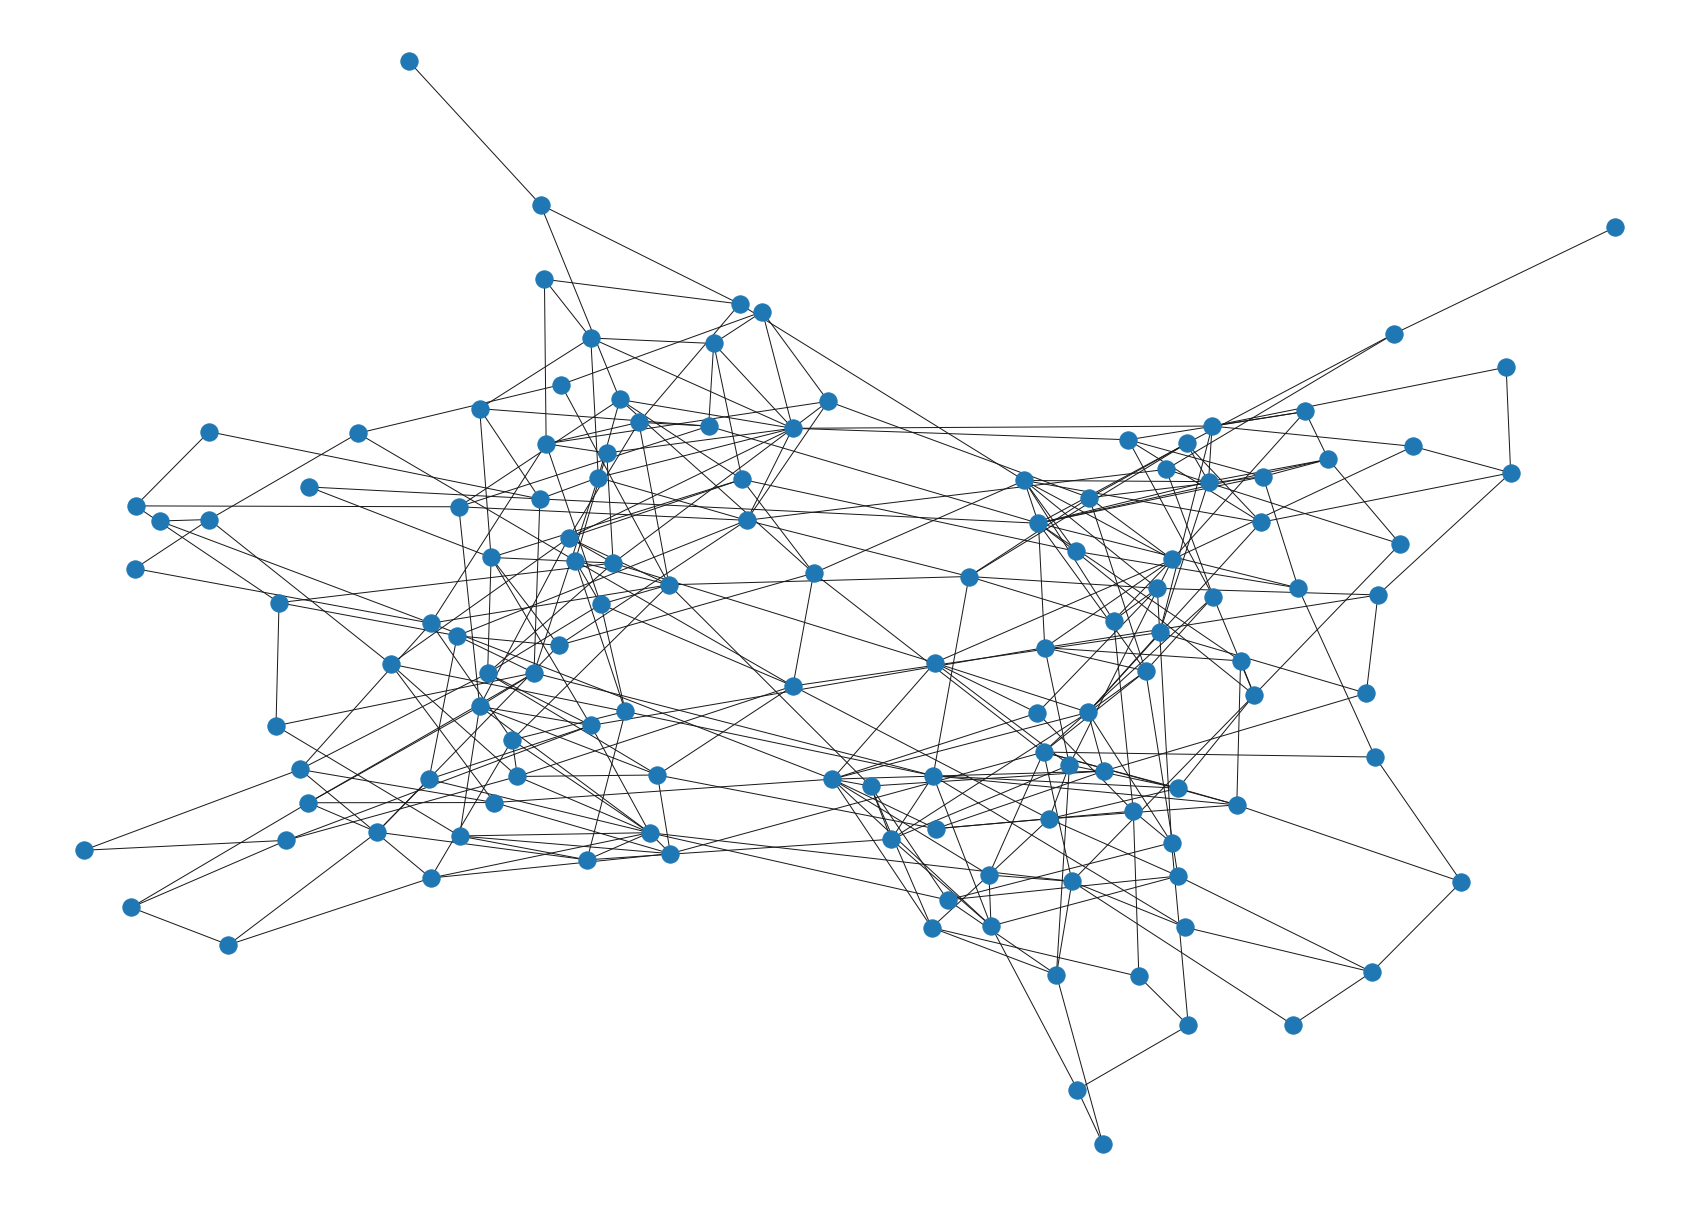

In [160]:
MC = nx.Graph()
p = np.percentile(np.abs(A.flatten()),90)
#print(p)
for i in range(128):
    for j in range(128):
        if i == j:
            continue
        if A[i,j] > p:
            MC.add_edge(i,j,w=A[i,j])
nx.draw(MC)

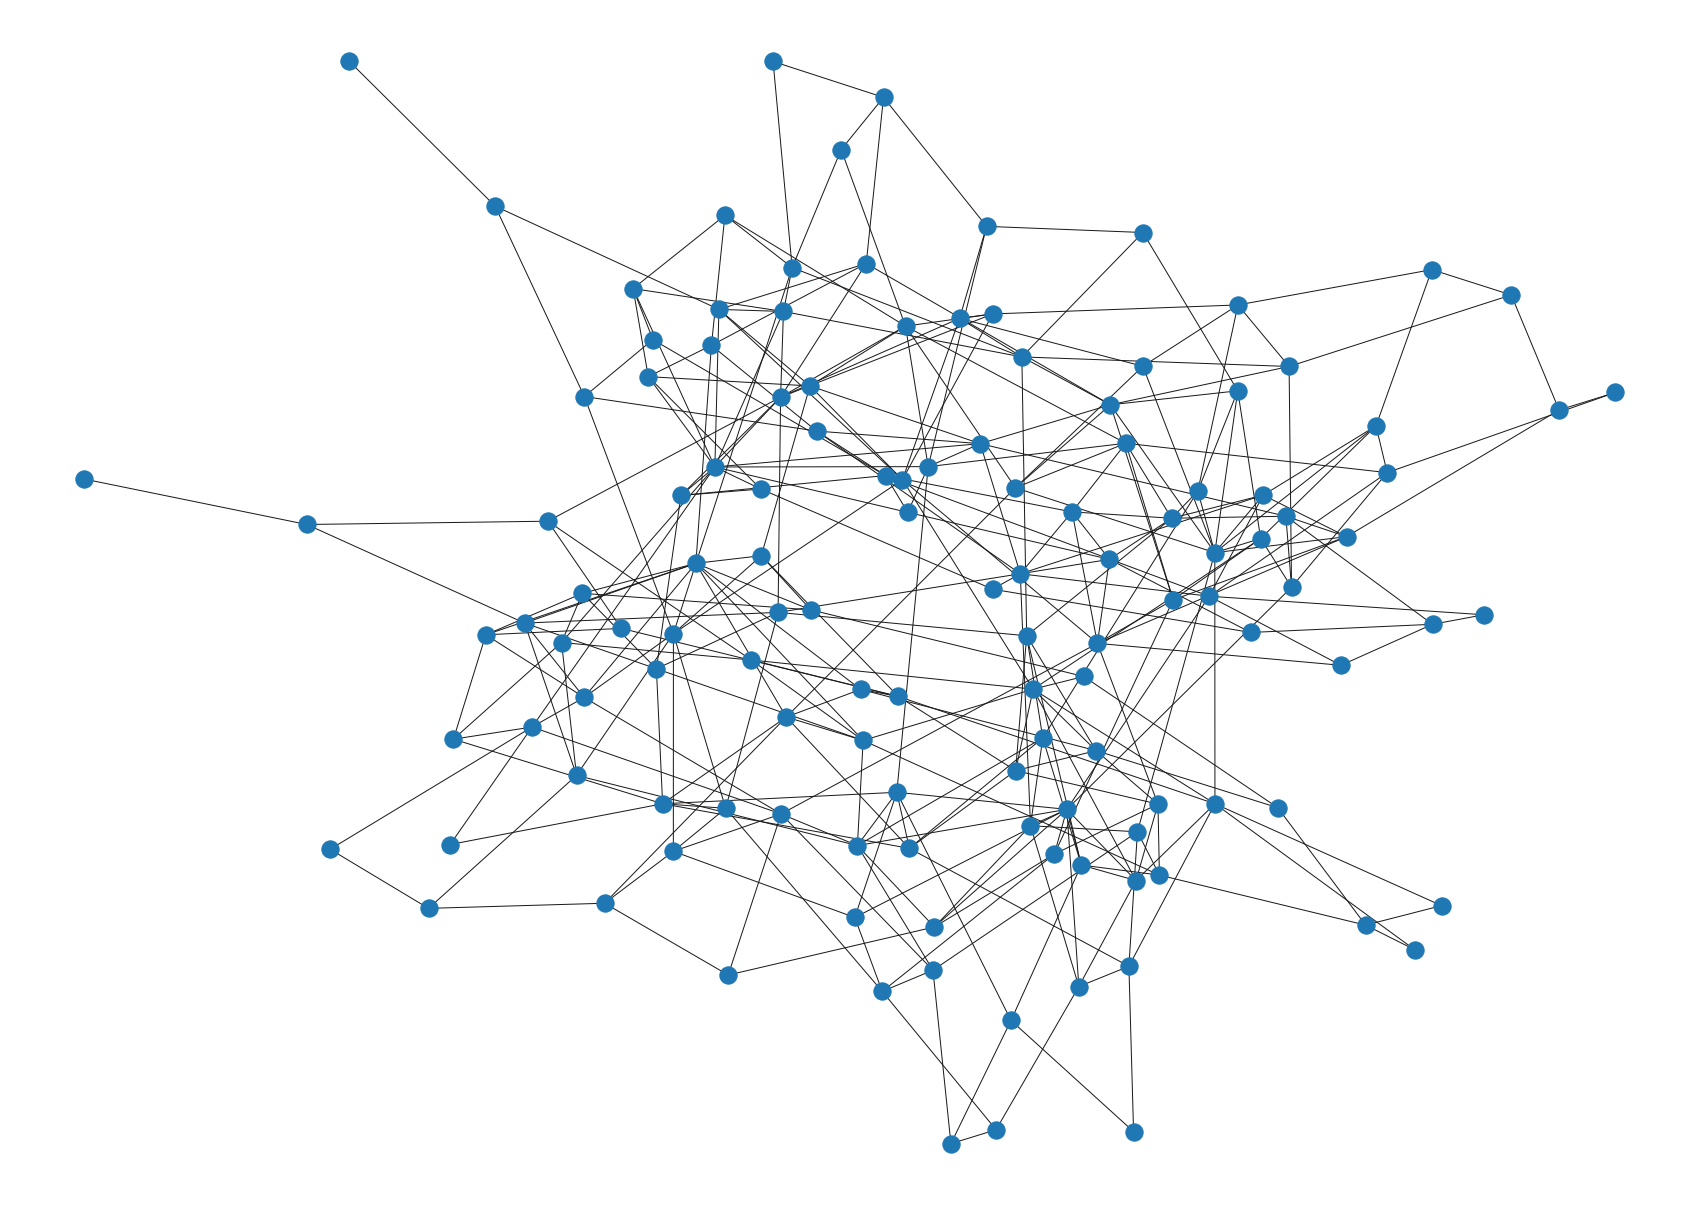

In [162]:
MC = nx.Graph()
p = np.percentile(np.abs(A.flatten()),90)
m = A.max()
#print(p)
for i in range(128):
    for j in range(128):
        if i == j:
            continue
        if A[i,j] > p:
            MC.add_edge(i,j,w=m/A[i,j])
nx.draw(MC)